In [106]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Texture features

Here is an example of a texture found in ultrasound medical imaging, the image exhibits a clear striation pattern due to muscle fiber orientation.

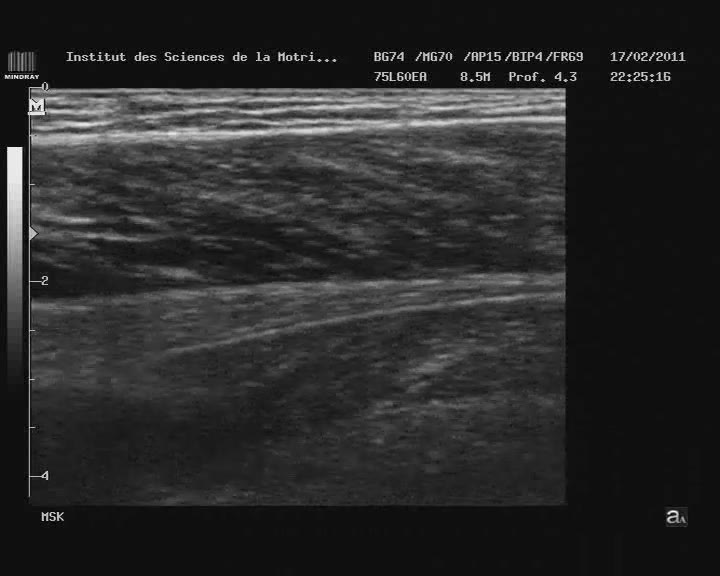

In [107]:
Image('http://homepages.ulb.ac.be/~odebeir/data/muscle.jpg')

The following video sequience illustrates how fiber orientation can vary during the motricity exercice.

In [108]:
from IPython.display import YouTubeVideo
YouTubeVideo('PUcz11MLxUk', start=0, autoplay=1, theme="light", color="blue",)

Here are some classical textures extracted from an atlas (Broadatz). Texture can be natural, such as grains, sand, soil, stone, biological tissue or resulting from a human artifact such as fabric, wall, pavements ...

Texture in an image can be characterized by a repetitive pattern or by a statistical geometrical distribution.

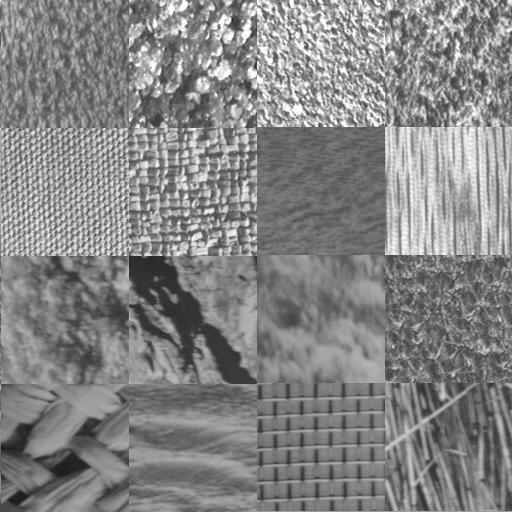

In [109]:
Image('http://www.tina-vision.net/ilib/ims_broadatz.jpg')

Texture is relative to a region content, it can by due to
 a specific gray-level dynamic, a gray-level organisation
 one define several oreder for texture description:
    
* first order : the pixel alone is used ti compute the texture descriptor
* second order : the pixel and one of its neighboor are used
* third order : more than 1 neighboor are used

## The coocurence matrix

>see also:
* the coocurence matrix in the [digital image section](../01-Introduction/03-Digital image.ipynb)

Coorence matrix can be defined such as:

$$
C^{\Delta x, \Delta y}_{i,j}=\sum_{p=1}^n\sum_{q=1}^m\begin{cases} 1, & \mbox{if }I(p,q)=i\mbox{ and }I(p+\Delta x,q+\Delta y)=j \\ 0, &\mbox{otherwise}\end{cases}
$$

for a given $(\Delta x, \Delta y)$ defining the neighborhood relationship.

From the coocurence matrix $C$ one can extract several descriptors that are sensitive to the texture:

Normalized coocurence matrix:

$$ P_{i,j} = \frac{C_{i,j}}{\sum^{N-1}_{i,j=0} C_{i,j}}$$





contrast measures

$$Contrast = \sum^{N-1}_{i,j=0} P_{i,j}(i-j)^2$$

$$Dissimilarity = \sum^{N-1}_{i,j=0} P_{i,j}|i-j|$$

$$Homogeneity = \sum^{N-1}_{i,j=0} \frac{P_{i,j}}{1+(i+j)^2}$$



organization measures

$$ASM = \sum^{N-1}_{i,j=0} P_{i,j}^2$$

$$ Energy = \sqrt{ASM}$$

$$entropy = - \sum^{N-1}_{i,j=0} P_{i,j} \, \log(P_{i,j})$$


statistical measures

$$ \mu_i =  \sum^{N-1}_{i,j=0} i\,P_{i,j} $$
$$ \mu_j =  \sum^{N-1}_{i,j=0} j\,P_{i,j} $$
$$ \sigma_i =  \sum^{N-1}_{i,j=0} (i-\mu_i)^2\,P_{i,j} $$
$$ \sigma_j =  \sum^{N-1}_{i,j=0} (j-\mu_j)^2\,P_{i,j} $$

$$Correlation = \sum^{N-1}_{i,j=0} P_{i,j} \, \frac{(i-\mu_i)(j-\mu_j)}{\sqrt{\sigma_i^2 \sigma_j^2}}$$

## The Gabor filters

Gabor filters are a family of 2D filter kernels based on the product of a cosine(a sine for imaginary part) function and a gaussian function such that:

for the real part:

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\cos\left(2\pi\frac{x'}{\lambda}+\psi\right)$$

and for the imaginary part:

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\sin\left(2\pi\frac{x'}{\lambda}+\psi\right)$$

where

$$x' = x \cos\theta + y \sin\theta$$

and

$$y' = -x \sin\theta + y \cos\theta$$

The Gabor parameters are:

* $\lambda$ the wave length
* $\theta$ the orientation
* $\sigma$ the gaussian envelope
* $\gamma$ the form factor
* $\psi$ the phase

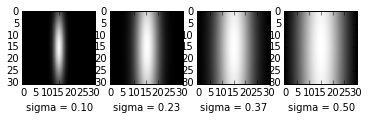

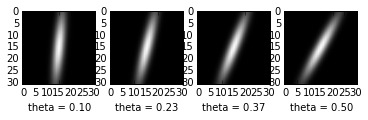

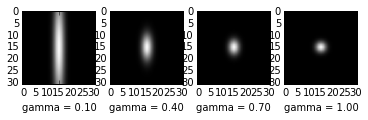

In [110]:
import numpy as np
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt

def gabor(sigma,theta,lam,psi,gamma,X,Y):
    Xt = X * np.cos(theta) + Y * np.sin(theta)
    Yt = -X * np.sin(theta) + Y * np.cos(theta)
    n = Xt**2. + gamma**2. * Yt**2.
    d = 2.0 * sigma**2
    E1 = np.exp(- n/d)
    a = 2.0*np.pi* Xt/lam + psi
    E2 = np.exp(1j * a)
    return E1 * E2

def getGaborKernel(ksize,sigma,theta,lambd,gamma,psi):
    X,Y = np.meshgrid(np.linspace(-1.,1.,ksize[0]),np.linspace(-1.,1.,ksize[1]))
    G = gabor(sigma=sigma,theta=theta,lam=lambd,psi=psi,gamma=gamma,X=X,Y=Y)
    return G


ksize = [31,31]
theta = 0.
lambd = 10.
gamma = .15
psi = np.pi
plt.figure();
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 6))
for i,sigma in enumerate(np.linspace(.1,.5,4)):
    kernel = getGaborKernel(ksize,sigma,theta,lambd,gamma,psi)
    axes[i].imshow(np.abs(kernel),cmap=plt.cm.gray);
    axes[i].set_xlabel('sigma = %.2f'%sigma)

plt.figure();
sigma = .1
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 6))
for i,theta in enumerate(np.linspace(.1,.5,4)):
    kernel = getGaborKernel(ksize,sigma,theta,lambd,gamma,psi)
    axes[i].imshow(np.abs(kernel),cmap=plt.cm.gray)
    axes[i].set_xlabel('theta = %.2f'%theta)
    
plt.figure();
theta = 0
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 6))
for i,gamma in enumerate(np.linspace(.1,1,4)):
    kernel = getGaborKernel(ksize,sigma,theta,lambd,gamma,psi)
    axes[i].imshow(np.abs(kernel),cmap=plt.cm.gray)
    axes[i].set_xlabel('gamma = %.2f'%gamma)
    
plt.show()

## Hurst coefficient

Hurst coefficient are related to the local fractal dimension, the algorithm is the following:

* compute local max and min (typ. on a 7 pixel octogonal neighbourhood)
* plot the log (difference) vs log (distance)
* least square fit the curve

| pixel | # | distance |
|-------|:-:|---------:|
| a     | 1 |        0 |
| b     | 4 |        1 |
| c     | 4 | 1.41     |
| d     | 4 | 2        |
| e     | 8 | 2.236    |
| f     | 4 | 2.828    |
| g     | 4 | 3        |
| h     | 8 | 3.162    |


|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
|   |   | h | g | h |   |   |
|   | f | e | d | e | f |   |
| h | e | c | b | c | e | h |
| g | d | b | a | b | d | g |
| h | e | c | b | c | e | h |
|   | f | e | d | e | f |   |
|   |   | h | g | h |   |   |



## Fractal analysis

Similarly we can analyse the value of the image filtered by a gaussian filter in a
log/log plot of the pixel value with respect to the sigma of the filter. In the following example we compute the pixel gray level in five points located on the central line,
the gray level is evaluated after applying a gaussian filter of increasing sigma.



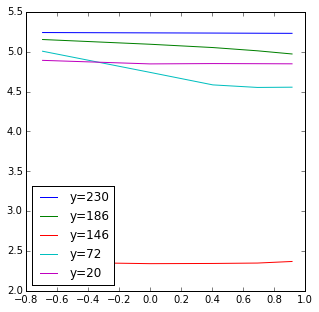

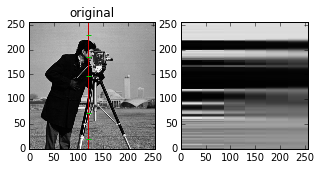

In [111]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as npy
from skimage.data import camera,imread
from scipy import ndimage,interpolate
from scipy.ndimage.filters import convolve,gaussian_filter
from os.path import join
from mpl_toolkits.mplot3d import Axes3D


im = camera()[-1::-2,::2].astype(float)

sigmas = npy.asarray([.5,1.,1.5,2.,2.5])

C = im.copy().astype(float)
C = C[:,:,npy.newaxis]

for s in sigmas:
    c = gaussian_filter(im,s)
    C = npy.dstack((C,c[:,:,npy.newaxis]))

sample_n = 120
samples_m = [230,186,146,72,20]

log_scale = npy.log(sigmas)

plt.figure(figsize=[5,5])
for m in samples_m:
    value = npy.ravel(C[m,sample_n,1:])
    log_value = npy.log(value)
    plt.plot(log_scale,log_value,label='y=%d'%m)
plt.legend(loc=3)

plt.figure(figsize=[5,5])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('original')
plt.vlines(sample_n,0,256,color=[.8,0,0])

for m in samples_m:
    plt.hlines(m,sample_n-5,sample_n+5,color=[0,0.8,0])


plt.subplot(2,2,2)
plt.imshow(C[:,sample_n,:],interpolation='nearest',cmap=cm.gray,origin='lower',extent=[0,256,0,256])
plt.show()

Some location have a constant value with respect to the gaussian radius, suach as the pixel located in the sky, it means that this part of the image is very homogeneous and insensitive to gaussian filtering, on the opposite, a pixel located in the tripod ($y=72$) exhibits a variable profile, because it is situated into a part of the image having more high frequencies, therefore more sensitive to the gaussian filter.

In the following example, we apply the same process to Broadatz textures and compute the slope of the line fitting the curve of the gray-level with respect to the gaussian sigma in the log-log space.

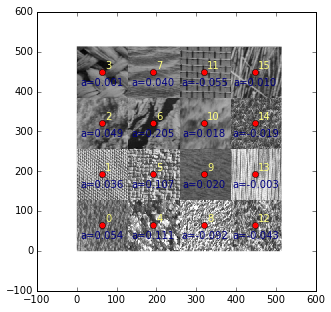

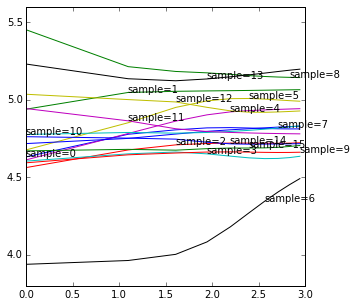

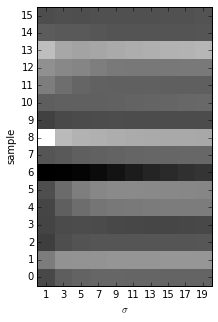

In [112]:
def fit(x,y):
    """returns m,c such that y=ax+b fit x,y data
    """
    A = npy.vstack([x, npy.ones(len(x))]).T
    a, b = npy.linalg.lstsq(A, y)[0]

    return (a,b)

im = imread('http://www.tina-vision.net/ilib/ims_broadatz.jpg').astype(float)



sigmas = npy.arange(1,20,2)

C = im.copy().astype(float)
C = C[:,:,npy.newaxis]

for s in sigmas:
    c = gaussian_filter(im,s)
    C = npy.dstack((C,c[:,:,npy.newaxis]))

#sampling positions
s_m,s_n = npy.meshgrid(range(64,512,128),range(64,512,128))

n_sample = s_m.ravel().shape[0]
n_sigmas = sigmas.shape[0]


P = npy.zeros((n_sample,n_sigmas))

log_scale = npy.log(sigmas)

plt.figure(0,figsize=[5,5])
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.figure(1,figsize=[5,5])

for i,(m,n) in enumerate(zip(s_m.ravel(),s_n.ravel())):

    value = npy.ravel(C[m,n,1:])
    log_value = npy.log(value)
    P[i,:] = value

    #fitting a line
    a,b = fit(log_scale,log_value)


    plt.figure(0)
    plt.plot(m,n,'ro')
    plt.text(n+10,m+10,'%d'%i,color=[1.,1.,.5])
    plt.text(n,m-32,'a=%.3f'%a,color=[0.,0.,.5],horizontalalignment='center')

    plt.figure(1)
    plt.plot(log_scale,log_value)
    #add legend close to the lines
    plt.text(log_scale[i%n_sigmas],log_value[i%n_sigmas],'sample=%d'%i)

plt.figure(2,figsize=[5,5])
plt.imshow(P,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.yticks(range(n_sample))
plt.xticks(range(n_sigmas),sigmas)
plt.xlabel('$\sigma$')
plt.ylabel('sample')

plt.show()

>see also:
* Texture [DIP](../00-Preface/06-References.ipynb#[DIP]) p506
* Fractal analysis: Hurst coeficient  [IPH](../00-Preface/06-References.ipynb#[IPH]) p262,208
* Spectral approach  [DIP](../00-Preface/06-References.ipynb#[DIP]) p511
* Gabor filters  [HCVA](../00-Preface/06-References.ipynb#[HCVA]) vol2 p71
* Edge-flow  [Ma00](../00-Preface/06-References.ipynb#[Ma00]) vol2 p71
* ...  [DIPCASA](../00-Preface/06-References.ipynb#[DIPCASA]) p185